In [51]:
import sqlite3
import pandas as pd
import numpy as np
# 连接到数据库文件
conn = sqlite3.connect("../pokemmo.sqlite")
# 创建游标对象
cursor = conn.cursor()

In [52]:
# 执行查询语句
query = """
SELECT x_coords,y_coords,map_number_tuple FROM general_status
where map_number_tuple = '(2, 1, 141)'
or map_number_tuple = '(2, 1, 61)'
"""
cursor.execute(query)

# 获取查询结果
results = cursor.fetchall()
df = pd.DataFrame(results, columns=['x_coords', 'y_coords', 'map_number_tuple'])
df.head()



,x_coords,y_coords,map_number_tuple
0,786,734,"(2, 1, 61)"
1,786,733,"(2, 1, 61)"
2,786,732,"(2, 1, 61)"
3,786,731,"(2, 1, 61)"
4,786,729,"(2, 1, 61)"


In [53]:
numeric_cols = ['x_coords', 'y_coords', 'map_number_tuple']
statistics = df[numeric_cols].describe()
print(statistics)

          x_coords     y_coords
count  2094.000000  2094.000000
mean    789.719198   672.057784
std       4.650668    15.966520
min     771.000000   646.000000
25%     787.000000   661.000000
50%     790.000000   667.000000
75%     793.000000   683.000000
max     799.000000   734.000000


增加offset

In [54]:
df['new_x']=df['x_coords']
df['new_y'] = df['y_coords']

# df['new_x'] = df.apply(lambda row: row['new_x'] +442 if row['map_number_tuple'] == '(2, 0, 133)' else row['new_x'], axis=1)
# df['new_y'] = df.apply(lambda row: row['new_y'] +169 if row['map_number_tuple'] == '(2, 0, 133)' else row['new_y'], axis=1)

# df['new_x'] = df.apply(lambda row: row['new_x'] +55 if row['map_number_tuple'] == '(0, 0, 24)' else row['new_x'], axis=1)
# df['new_y'] = df.apply(lambda row: row['new_y'] +15 if row['map_number_tuple'] == '(0, 0, 24)' else row['new_y'], axis=1)

# df['new_x'] = df.apply(lambda row: row['new_x'] +48 if row['map_number_tuple'] == '(0, 33, 3)' else row['new_x'], axis=1)
# df['new_y'] = df.apply(lambda row: row['new_y'] +10 if row['map_number_tuple'] == '(0, 33, 3)' else row['new_y'], axis=1)


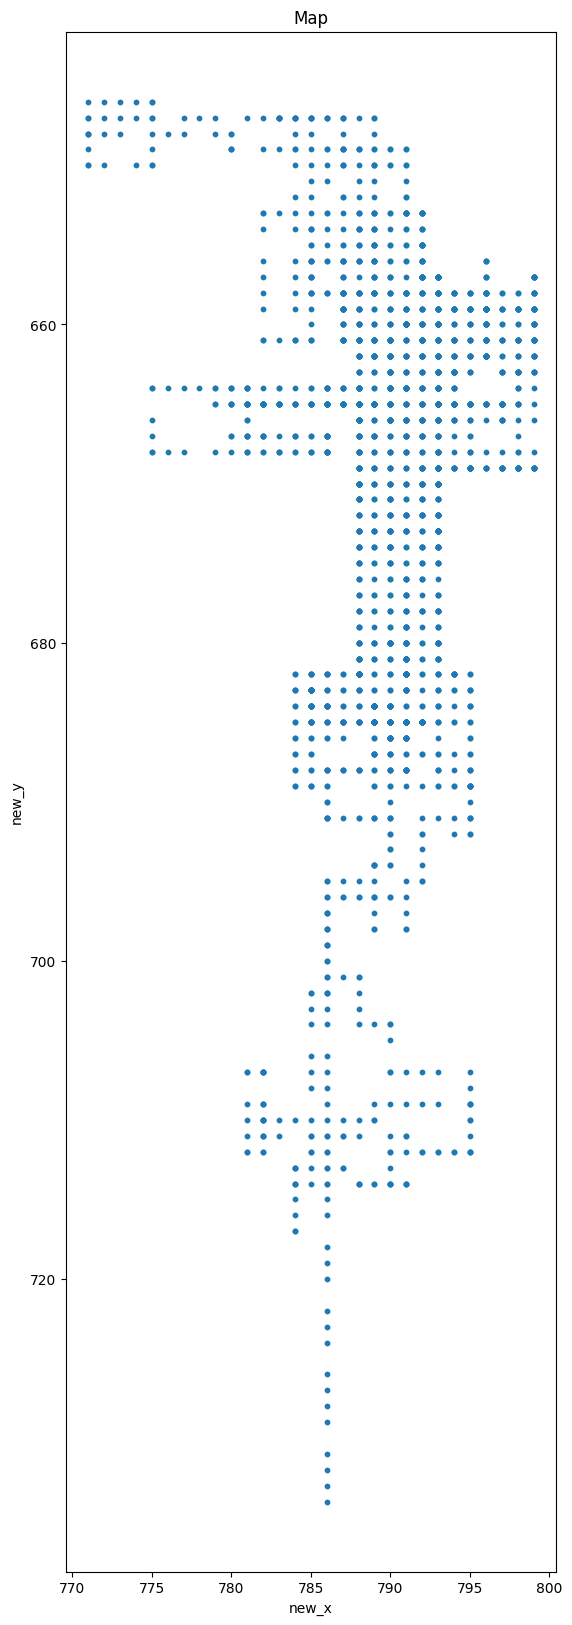

In [55]:
import matplotlib.pyplot as plt

# 创建图形对象和坐标轴
fig, ax = plt.subplots(figsize=(20, 20))  # 调整图形大小

# 绘制散点图，调整坐标点大小
ax.scatter(df['new_x'], df['new_y'], s=10)  # 调整坐标点大小

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('new_x')
ax.set_ylabel('new_y')

# 设置标题
ax.set_title('Map')

# 调整坐标轴比例相同
ax.set_aspect('equal')

# 显示图形
plt.show()


In [56]:
# 将坐标点四舍五入到最近的整数
df = df.round(0)
# 创建一个空的DataFrame，它的行和列分别代表y和x的值
grid_df = pd.DataFrame(index=np.arange(int(df['new_y'].min()), int(df['new_y'].max()) + 1),
                       columns=np.arange(int(df['new_x'].min()), int(df['new_x'].max()) + 1))

# 将存在的坐标点填充为1
for _, row in df.iterrows():
    grid_df.at[int(row['new_y']), int(row['new_x'])] = 1

# # 反转y轴
#grid_df = grid_df.iloc[::-1]

# 导出到Excel
grid_df.to_excel("../asserts/coords_tracking/Accumula Town Field coordinates.xlsx")

In [57]:
import sqlite3
import pandas as pd
import numpy as np
df=pd.read_excel("../asserts/coords_tracking/Accumula Town Field coordinates.xlsx", index_col=0)
# 先重置索引，这样行标签就变成一列
df = df.reset_index()
df

,index,771,772,773,774,775,776,777,778,779,...,790,791,792,793,794,795,796,797,798,799
0,646,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,647,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,648,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,649,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,650,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# 使用 melt，这会把所有列都转成两列，一列是原来的列名（变量），一列是对应的值
df_melted = df.melt(id_vars='index', var_name='x_coords', value_name='mark')
df_melted

,index,x_coords,mark
0,646,771,1.0
1,647,771,1.0
2,648,771,1.0
3,649,771,1.0
4,650,771,1.0
...,...,...,...
2576,730,799,NaN
2577,731,799,NaN
2578,732,799,NaN
2579,733,799,NaN


In [59]:
# 修改列名
df_melted.rename(columns={'index': 'y_coords'}, inplace=True)
df_melted

,y_coords,x_coords,mark
0,646,771,1.0
1,647,771,1.0
2,648,771,1.0
3,649,771,1.0
4,650,771,1.0
...,...,...,...
2576,730,799,NaN
2577,731,799,NaN
2578,732,799,NaN
2579,733,799,NaN


In [60]:
# 过滤掉 mark 列为 NaN 的行
df_melted = df_melted.dropna(subset=['mark'])
df_melted

,y_coords,x_coords,mark
0,646,771,1.0
1,647,771,1.0
2,648,771,1.0
3,649,771,1.0
4,650,771,1.0
...,...,...,...
2510,664,799,1.0
2511,665,799,1.0
2512,666,799,1.0
2514,668,799,1.0


In [61]:
# 把值为PC_IN的单元格的值改成112
df_melted.loc[df_melted['mark'] == 'pc_in', 'mark'] = 112

df_melted.loc[df_melted['mark'] == 'farming', 'mark'] = 66
# 所有float类型的值转成int
df_melted = df_melted.astype({'mark': 'int'})

df_melted.reset_index(drop=True, inplace=True)

# 输出查看结果
print(df_melted)

     y_coords x_coords  mark
0         646      771     1
1         647      771     1
2         648      771     1
3         649      771     1
4         650      771     1
..        ...      ...   ...
615       664      799     1
616       665      799     1
617       666      799     1
618       668      799     1
619       669      799     1

[620 rows x 3 columns]


In [62]:
df_melted.to_csv('../asserts/coords_tracking/Accumula_Town_Field_coords_tracking.csv')

In [49]:
# 关闭游标和连接
cursor.close()
conn.close()